# Coursework I

This notebook describes the first part of the ML coursework (code).  This part builds on work that you have already done during the labs.  The purpose of this coursework, along with the previous lab work, is to:
- Get familiar with **common python modules / functions** used for ML in python
- Get practical experience **implementing** ML methods in python  
- Get practical experience regarding **parameter selection** for ML methods
- Get practical experience on **evaluating** ML methods and applying cross-validation

Notes:
- CW based on work that you did in the lab - don't use libraries that implement kNN or cross-validation.  We want to see your code!
- For more details, read the coursework PDF on learn.gold

In [1]:
from sklearn import datasets
import numpy as np
import matplotlib.pyplot as plt
# Load the IRIS dataset
iris = datasets.load_iris()

#Set X equal to features, y equal to the targets
X = iris.data 
y = iris.target 

mySeed=1234567

## 1. Exploratory Data Analysis

In Lab 2, we discussed how the first part of tackling an ML problem is visualization, in order to understand some of the properties of the problem at-hand.  In the same lab, you were asked to reproduce a figure that plots pairs of features used in our problem.  Fill-in the code you used to plot this figure from Lab 2 in the cell below.  

You should create a function that given data X and labels y plots the 4x4 grid.  The function should be invoked as
    
    myplotGrid(X,y)
    
where X is your training data and y are the labels

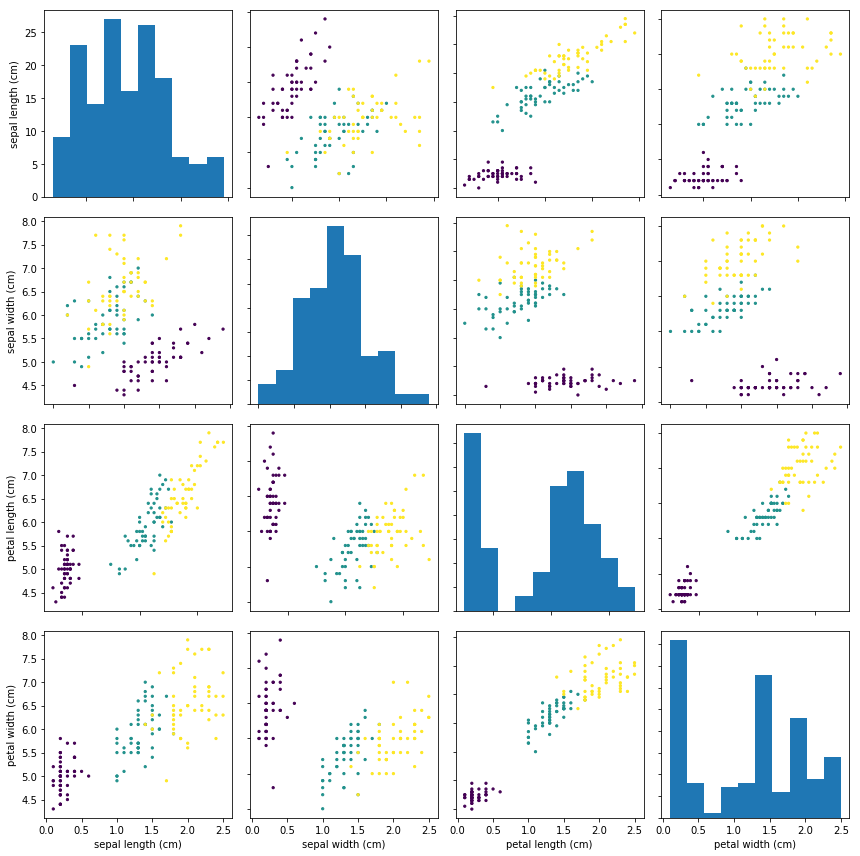

In [2]:
def myplotGrid(X,y):
    """
    Plot pairs of features
    Args:
        X: training data
        y: labels
    Returns:
        a figure that plots pairs of featuresa as a 4x4 grid
    """
    fig, axes = plt.subplots(4, 4, figsize=(12,12))

    for i in range(0, 4):
        for j in range(0, 4):
            if i==j:
                axes[i, j].hist(X[:,i])
                axes[i, j].set(xlabel = iris.feature_names[j], ylabel = iris.feature_names[i])
            else:
                axes[i, j].scatter(X[:, i], X[:, j], c=y, s=5)
                axes[i, j].set(xlabel = iris.feature_names[j], ylabel = iris.feature_names[i])
    
    # Hide x labels and tick labels for top plots and y ticks for right plots.
    for ax in axes.flat:
        ax.label_outer()
    plt.tight_layout()
    
myplotGrid(X,y)

### 1.2. Exploratory Data Analysis under noise

When data are collected under real-world settings (e.g., from webcams or other errors) they usually contain some amount of noise that makes classification more challenging. In the cell below, invoke your exploratory data analysis function above on a noisy version of your data X.

Try to perturb your data with some Gaussian noise,


    np.random.seed(mySeed) # initialize random seed to replicate results over different runs
    XN=X+np.random.normal(0,0.5,X.shape)
    
and then invoke

    myplotGrid(XN,y)

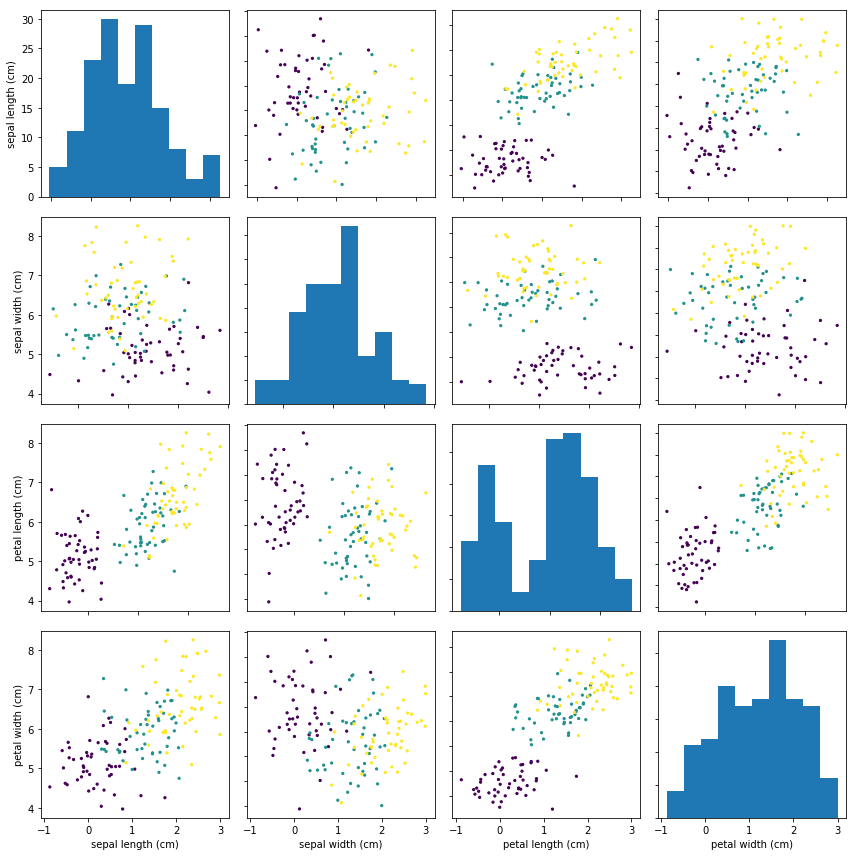

In [3]:
np.random.seed(mySeed) # initialize random seed to replicate results over different runs
XN=X+np.random.normal(0,0.5,X.shape)
myplotGrid(XN,y)

## 2. Implementing kNN

In the cell below, develop your own code for performing k-Nearest Neighbour classification.  You are guided to do this by following the notebook in Lab 4.  Define a function that performs k-NN given a set of data.  Your function should be invoked similary to:

        y_ = mykNN(X,y,X_,options)
        
where X is your training data, y is your training outputs, X\_ are your testing data and y\_ are your predicted outputs for X\_.  The options argument (can be a list or a set of separate arguments depending on how you choose to implement the function) should at least contain the number of neighbours to consider as well as the distance function employed.

In [4]:
from collections import Counter

def euclidean_distance(in1, in2):
    distance = np.linalg.norm(in1 - in2)
    return distance

def manhattan_distance(in1, in2):
    distance = sum(abs(in1 - in2))
    return distance

def chebyshev_distance(in1, in2):
        distance = np.max(np.abs(in1 - in2))
        return distance
    
def confMatrix(y_test, y_pred, number_of_classes):
    """
    Compute confusion matrix to evaluate the accuracy of the classification
    Args:
        y_test: Test labels as Pandas Series
        predictions: Predicted labels as Python list
        number_of_classes: The number of classes
    Returns:
        The confusion matrix
    """
    cm = np.zeros((number_of_classes, number_of_classes)) # initialize the confusion matrix to zeros
    for a, p in zip(y_test, y_pred):
        cm[p][a] += 1
    #loop through all results and update the confusion matrix
    return cm

def printConfusionMatrix(k, dist, accuracy, cm):
    true_0_pred_0 = cm[0][0]
    true_0_pred_1 = cm[1][0]
    true_0_pred_2 = cm[2][0]
    true_1_pred_0 = cm[0][1]
    true_1_pred_1 = cm[1][1]
    true_1_pred_2 = cm[2][1]
    true_2_pred_0 = cm[0][2]
    true_2_pred_1 = cm[1][2]
    true_2_pred_2 = cm[2][2]

    class_precision_0 = (true_0_pred_0/(true_0_pred_0+true_1_pred_0+true_2_pred_0)) * 100
    class_precision_1 = (true_1_pred_1/(true_1_pred_1+true_0_pred_1+true_2_pred_1)) * 100
    class_precision_2 = (true_2_pred_2/(true_2_pred_2+true_0_pred_2+true_1_pred_2)) * 100
    class_recall_0 = (true_0_pred_0/(true_0_pred_0+true_0_pred_1+true_0_pred_2)) * 100 
    class_recall_1 = (true_1_pred_1/(true_1_pred_1+true_1_pred_0+true_1_pred_2)) * 100 
    class_recall_2 = (true_2_pred_2/(true_2_pred_2+true_2_pred_0+true_2_pred_1)) * 100

    print('\nValue of k: {}, distance metric: {}, accuracy: {:.2f}% \n'
    '\n \t\t|  true 0 \t|  true 1 \t|  true 2 \t|  class precision \n'
    'predicted 0\t|  {:.0f}\t\t|  {:.0f}\t\t|  {:.0f}\t\t|  {:.2f}%\n'
    'predicted 1\t|  {:.0f}\t\t|  {:.0f}\t\t|  {:.0f}\t\t|  {:.2f}%\n'
    'predicted 2\t|  {:.0f}\t\t|  {:.0f}\t\t|  {:.0f}\t\t|  {:.2f}%\n'
    'class recall\t|  {:.2f}%\t|  {:.2f}%\t|  {:.2f}%\n'
    .format(k, dist, accuracy, 
    cm[0][0], cm[0][1], cm[0][2], class_precision_0,
    cm[1][0], cm[1][1], cm[1][2], class_precision_1,
    cm[2][0], cm[2][1], cm[2][2], class_precision_2,
    class_recall_0, class_recall_1, class_recall_2
    ))

def getAccuracy(y_test, predictions):
    """
    Evaluate the accuracy of our model’s predictions
    Args:
        y_test: Test labels as Pandas Series
        predictions: Predicted labels as Python list
    Returns:
        The classification accuracy (%)
    """
    accuracy = ((np.sum(y_test == predictions))/float(len(y_test))) * 100
    return accuracy
    
def predict(X_train, y_train, X_test, k, dist):
    """
    Classify our data point as the majority class between K samples in the dataset having minimum distance to the sample
    Args:
        X_train: Training features as Pandas DataFrame
        y_train: Training labels as Pandas Series
        X_test: Testing features as Pandas DataFrame
        k: the number of nearest neighbours considered for classification
        dist: metric used to calculate distance between two data points (euclidean or manhattan or chebyshev)
    Returns:
        mostCommon: Predicted label for our data point (0 or 1 or 2)
    """
    distances = [0] * len(X_train) # to store distances
    labels = [0] * k # to store k nearest neighbour's associated labels
    for i in range(len(X_train)):
        if dist == 'euclidean':
            distance = euclidean_distance(X_test, X_train[i]) # compute distance
            distances[i] = [distance, i] # add it to list of distances (distance, index pairs)
        if dist == 'chebyshev':
            distance = chebyshev_distance(X_test, X_train[i])
            distances[i] = [distance, i]
        else:
            distance = manhattan_distance(X_test, X_train[i])
            distances[i] = [distance, i]
    # sort the list by distance, in increasing order
    distances = sorted(distances)
    
    # take the first k distances from this sorted list
    for i in range(k):
        # Find those k-points (by index) corresponding to these k-distances
        index = distances[i][1]
        # look up the associated label, add it to list of labels
        labels[i] = y_train[index]
        c = Counter(labels)
        # get majority label. if we have a tie, take the first item
        mostCommon = c.most_common(1)[0][0]
        
    # return the most common label (most common value for 'earns' for k nearest neighbour: 0 or 1 or 2)
    return mostCommon

def kNN(X_train, y_train, X_test, predictions, k, dist):
    """
    Make a prediction for every data point in the test dataset
    Store them in a list (predictions)
    Args:
        X_train: Training features as Pandas DataFrame
        y_train: Training labels as Pandas Series
        predictions: list to store predicted labels
        k: the number of nearest neighbours considered for classification
        distance_metric: metric used to calculate distance between two data points
    """
    # loop over all test instances
    for i in range(len(X_test)):
        # make a prediction and add it to the list of predictions
        predictions.append(predict(X_train, y_train, X_test[i], k, dist))
        

#we add some random noise to our data to make the task more challenging
#XN=X+np.random.normal(0,0.5,X.shape)

np.random.seed(mySeed)
indices= np.random.permutation(X.shape[0]) 
bins=np.array_split(indices,2) # we  just need a training and testing set here
foldTrain=bins[0]
foldTest=bins[1]


distances = ['manhattan', 'euclidean']
for dist in distances:
    for k in range(1, 11):
        predictions = []
        kNN(X[foldTrain], y[foldTrain], X[foldTest], predictions, k, dist)
        print('Labels: {} \n Predictions: {}'.format(y[foldTest], predictions))
        # calculate accuracy
        accuracy = getAccuracy(y[foldTest], predictions)
        print(' Value of k: {}, distance metric: {}, accuracy: {:.2f}%'.format(k, dist, accuracy))


Labels: [0 1 0 1 2 2 2 1 1 2 1 1 1 1 0 0 0 0 2 2 1 0 0 2 2 1 0 2 2 2 1 2 1 0 2 0 1
 0 2 0 1 0 1 2 2 0 2 2 0 0 2 1 0 0 1 0 0 2 2 1 0 2 0 0 0 1 2 2 2 1 1 1 2 2
 2] 
 Predictions: [0, 1, 0, 1, 1, 2, 2, 2, 1, 2, 1, 1, 1, 1, 0, 0, 0, 0, 2, 2, 1, 0, 0, 2, 2, 1, 0, 2, 2, 2, 1, 2, 1, 0, 2, 0, 1, 0, 2, 0, 1, 0, 1, 2, 2, 0, 2, 2, 0, 0, 2, 1, 0, 0, 1, 0, 0, 2, 2, 1, 0, 2, 0, 0, 0, 1, 2, 2, 2, 1, 1, 2, 2, 2, 2]
 Value of k: 1, distance metric: manhattan, accuracy: 96.00%
Labels: [0 1 0 1 2 2 2 1 1 2 1 1 1 1 0 0 0 0 2 2 1 0 0 2 2 1 0 2 2 2 1 2 1 0 2 0 1
 0 2 0 1 0 1 2 2 0 2 2 0 0 2 1 0 0 1 0 0 2 2 1 0 2 0 0 0 1 2 2 2 1 1 1 2 2
 2] 
 Predictions: [0, 1, 0, 1, 1, 2, 2, 2, 1, 2, 1, 1, 1, 1, 0, 0, 0, 0, 2, 2, 1, 0, 0, 2, 2, 1, 0, 2, 2, 2, 1, 2, 1, 0, 2, 0, 1, 0, 2, 0, 1, 0, 1, 2, 2, 0, 2, 2, 0, 0, 2, 1, 0, 0, 1, 0, 0, 2, 2, 1, 0, 2, 0, 0, 0, 1, 2, 2, 2, 1, 1, 2, 2, 2, 2]
 Value of k: 2, distance metric: manhattan, accuracy: 96.00%
Labels: [0 1 0 1 2 2 2 1 1 2 1 1 1 1 0 0 0 0 2 2 1 0 0 2 2 1 0 2 2 2 1 2

Labels: [0 1 0 1 2 2 2 1 1 2 1 1 1 1 0 0 0 0 2 2 1 0 0 2 2 1 0 2 2 2 1 2 1 0 2 0 1
 0 2 0 1 0 1 2 2 0 2 2 0 0 2 1 0 0 1 0 0 2 2 1 0 2 0 0 0 1 2 2 2 1 1 1 2 2
 2] 
 Predictions: [0, 1, 0, 1, 1, 2, 2, 1, 1, 2, 1, 1, 1, 1, 0, 0, 0, 0, 2, 2, 1, 0, 0, 2, 2, 1, 0, 2, 2, 2, 1, 2, 1, 0, 2, 0, 1, 0, 2, 0, 1, 0, 1, 2, 2, 0, 2, 2, 0, 0, 2, 1, 0, 0, 1, 0, 0, 2, 2, 1, 0, 1, 0, 0, 0, 1, 2, 2, 2, 1, 1, 2, 2, 2, 2]
 Value of k: 9, distance metric: euclidean, accuracy: 96.00%
Labels: [0 1 0 1 2 2 2 1 1 2 1 1 1 1 0 0 0 0 2 2 1 0 0 2 2 1 0 2 2 2 1 2 1 0 2 0 1
 0 2 0 1 0 1 2 2 0 2 2 0 0 2 1 0 0 1 0 0 2 2 1 0 2 0 0 0 1 2 2 2 1 1 1 2 2
 2] 
 Predictions: [0, 1, 0, 1, 1, 2, 2, 1, 1, 2, 1, 1, 1, 1, 0, 0, 0, 0, 2, 2, 1, 0, 0, 2, 2, 1, 0, 2, 2, 2, 1, 2, 1, 0, 2, 0, 1, 0, 2, 0, 1, 0, 1, 2, 2, 0, 2, 2, 0, 0, 2, 1, 0, 0, 1, 0, 0, 2, 2, 1, 0, 2, 0, 0, 0, 1, 2, 2, 2, 1, 1, 2, 2, 2, 2]
 Value of k: 10, distance metric: euclidean, accuracy: 97.33%


## 3. Nested Cross-validation using your implementation of KNN

In the cell below, develop your own code for performing 5-fold nested cross-validation along with your implemenation of k-NN above.  Again, you are guided to complete this task by following the appropriate notebook in Lab 4.  Your code for nested cross-validation should invoke your kNN function (see above).  You cross validation function should be invoked similary to:

    accuracy_fold=myNestedCrossVal(X,y,5,list(range(1,11)),['euclidean','manhattan'],mySeed)
    
where X is your data matrix (containing all samples and features for each sample), 5 is the number of folds, y are your known output labels, ``list(range(1,11)`` evaluates the neighbour parameter from 1 to 10, and ``['euclidean','manhattan']`` evaluates the two distances on the validation sets.  mySeed is simply a random seed to enable us to replicate your results.

**Notes:** 
- you should perform nested cross-validation on both your original data X, as well as the data pertrubed by noise as shown in the cells above (XN)
- you should implement/validate at least two distance functions
- you should evaluate number of neighbours from 1 to 10
- your function should return a list of accuracies per fold
- for each fold, your function should print:
  - the accuracy per distinct set of parameters on the validation set
  - the best set of parameters for the fold after validation
  - the confusion matrix per fold (on the testing set)


In [5]:
def myNestedCrossVal(X,y,foldK,k,dists,mySeed):
    np.random.seed(mySeed)
    accuracy_fold = np.zeros(foldK)
    cm_sum = np.zeros((3,3))
    indices = np.random.permutation(list(range(X.shape[0])))
    bins = np.split(indices, foldK)
    
    #loop through folds
    for i in range(0,foldK):
        foldTest = bins[i%foldK]  # list to save current indices for testing
        foldVal = bins[(i+1)%foldK]  # list to save current indices for validation
        foldTrain = np.delete(bins, ([i%foldK, (i+1)%foldK]), 0).reshape(-1) # list to save current indices for training       
        bestDistance=None #save the best distance metric here
        bestNN=1 #save the best number of neighbours here
        bestAccuracy=0 #save the best attained accuracy here (in terms of validation)
        # loop through all parameters (one for loop for distances, one for loop for nn)
        for dist in dists:
            for num in k:
                predictions = []
                #perform prediction on the validation set
                kNN(X[foldTrain], y[foldTrain], X[foldVal], predictions, num, dist)
                # obtain results on validation set
                currentAccuracy=getAccuracy(y[foldVal], predictions)
                # save parameters if results are the best we had
                bestAccuracy, bestDistance, bestNN = (currentAccuracy, dist, num) if currentAccuracy>=bestAccuracy else (bestAccuracy, bestDistance, bestNN)
        #evaluate on test data:
        #extend the training set by including the validation set
        foldTrain = np.concatenate((foldTrain, foldVal), 0)
        predictions = []
        
        #train k-NN classifier on new training set and test on test set
        kNN(X[foldTrain], y[foldTrain], X[foldTest], predictions, k=bestNN, dist=bestDistance)
        
        #get performance on fold, save result in accuracy_fold array
        accuracy_fold[i] = getAccuracy(y[foldTest], predictions)
        cm = confMatrix(y[foldTest], predictions, len(np.unique(y)))
        # build total confusion matrix
        cm_sum = np.add(cm_sum, cm)
        
        print('==== Final Cross-val on test on fold {} with best parameters: NN = {}, distance metric = {}, accuracy = {:.2f}% ===='.format(i+1, bestNN, bestDistance, accuracy_fold[i]))
        printConfusionMatrix(bestNN, bestDistance, accuracy_fold[i], cm)
        print('='*80,'\n')

    print('\n*****   Total confusion matrix over the 5-fold cross-validation   *****')
    printConfusionMatrix('N/A', 'N/A', accuracy_fold[i], cm_sum)
    
    mean = np.mean(accuracy_fold)
    std_dev = np.std(accuracy_fold)
    print('Mean: {}, standard deviation: {:.2f}'.format(mean, std_dev))
    return accuracy_fold

mySeed=1234567
#initialize random seed generator 
np.random.seed(mySeed)

#we add some random noise to our data to make the task more challenging
XN=X+np.random.normal(0,0.5,X.shape)


print('Performing nested cross-validation on the original data X\n\n')
accuracy_fold=myNestedCrossVal(X,y,5,list(range(1,11)),['euclidean', 'manhattan'],mySeed)
print('Accuracies per fold: {}'.format(accuracy_fold))

print('\n\nPerforming nested cross-validation on the noisy data XN \n\n')
accuracy_fold=myNestedCrossVal(XN,y,5,list(range(1,11)),['euclidean', 'manhattan'],mySeed)
print('Accuracies per fold: {}'.format(accuracy_fold))

Performing nested cross-validation on the original data X


==== Final Cross-val on test on fold 1 with best parameters: NN = 3, distance metric = manhattan, accuracy = 96.67% ====

Value of k: 3, distance metric: manhattan, accuracy: 96.67% 

 		|  true 0 	|  true 1 	|  true 2 	|  class precision 
predicted 0	|  11		|  0		|  0		|  100.00%
predicted 1	|  0		|  10		|  0		|  100.00%
predicted 2	|  0		|  1		|  8		|  88.89%
class recall	|  100.00%	|  90.91%	|  100.00%


==== Final Cross-val on test on fold 2 with best parameters: NN = 9, distance metric = manhattan, accuracy = 93.33% ====

Value of k: 9, distance metric: manhattan, accuracy: 93.33% 

 		|  true 0 	|  true 1 	|  true 2 	|  class precision 
predicted 0	|  12		|  0		|  0		|  100.00%
predicted 1	|  0		|  10		|  1		|  90.91%
predicted 2	|  0		|  1		|  6		|  85.71%
class recall	|  100.00%	|  90.91%	|  85.71%


==== Final Cross-val on test on fold 3 with best parameters: NN = 10, distance metric = manhattan, accuracy = 93.33% ===